In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [44]:
data = pd.read_csv('../Dataset Creation/synthetic_heart_attack_data_balanced.csv')

In [45]:
# Display dataset overview
print("Dataset Overview:")
print(tabulate(data.head(), headers="keys", tablefmt="pretty"))

Dataset Overview:
+---+-------------------+-------------------+--------------------+--------------------+-------------------------+
|   |    Heart_Rate     |       SpO2        |        GSR         |    Temperature     | Heart_Attack_Prediction |
+---+-------------------+-------------------+--------------------+--------------------+-------------------------+
| 0 | 79.96714153011233 | 97.79260354824322 | 13.943065614302078 | 37.261514928204015 |           0.0           |
| 1 | 97.39600444627798 | 92.53172608610164 | 24.31685126202957  | 38.52817726605564  |           1.0           |
| 2 | 70.30525614065049 | 98.81384006537894 | 10.609746921562614 | 36.26713512321487  |           0.0           |
| 3 | 109.0220762060162 | 89.1734395106844  | 11.100328669947867 | 37.10639872953132  |           0.0           |
| 4 | 70.71953935823765 | 96.88638974432124 |  9.88996859487778  | 35.430189671961884 |           0.0           |
+---+-------------------+-------------------+--------------------+----

In [46]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Heart_Rate               50000 non-null  float64
 1   SpO2                     50000 non-null  float64
 2   GSR                      50000 non-null  float64
 3   Temperature              50000 non-null  float64
 4   Heart_Attack_Prediction  50000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.9 MB
None


In [47]:
# Display summary statistics
print("\nSummary Statistics:")
summary_stats = data.describe()
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))


Summary Statistics:
+-------+--------------------+--------------------+--------------------+--------------------+-------------------------+
|       |     Heart_Rate     |        SpO2        |        GSR         |    Temperature     | Heart_Attack_Prediction |
+-------+--------------------+--------------------+--------------------+--------------------+-------------------------+
| count |      50000.0       |      50000.0       |      50000.0       |      50000.0       |         50000.0         |
| mean  | 89.30974053298927  |  95.5069784997655  | 14.955626750773193 | 37.13818683138882  |         0.37544         |
|  std  | 18.257211144616676 | 3.0600127794628613 | 4.547320221969162  | 0.8866773035375527 |   0.48424115499400067   |
|  min  | 37.70825619262936  |  85.0013355019439  |        5.0         | 34.62556111419692  |           0.0           |
|  25%  | 74.74078735091811  | 93.00703678611077  | 11.565290725833364 | 36.457440309167374 |           0.0           |
|  50%  |  87.40414

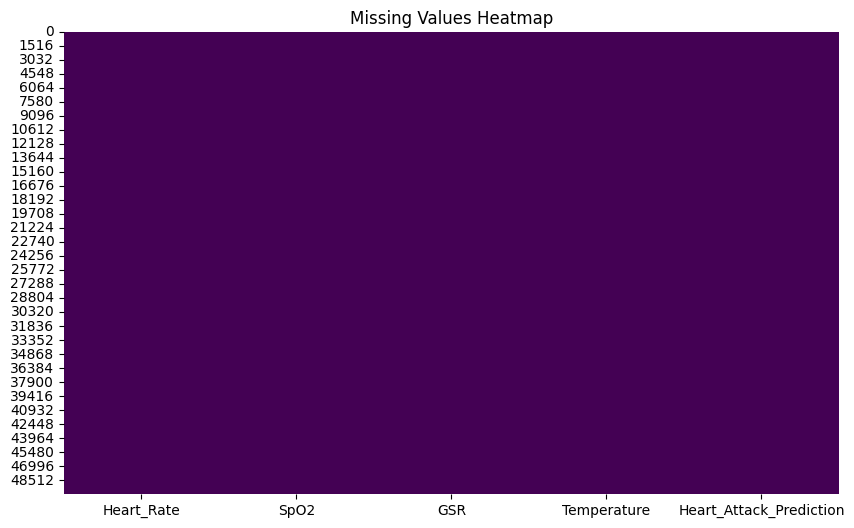

In [48]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [49]:
print("\nDuplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Duplicate Rows: 0


In [50]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

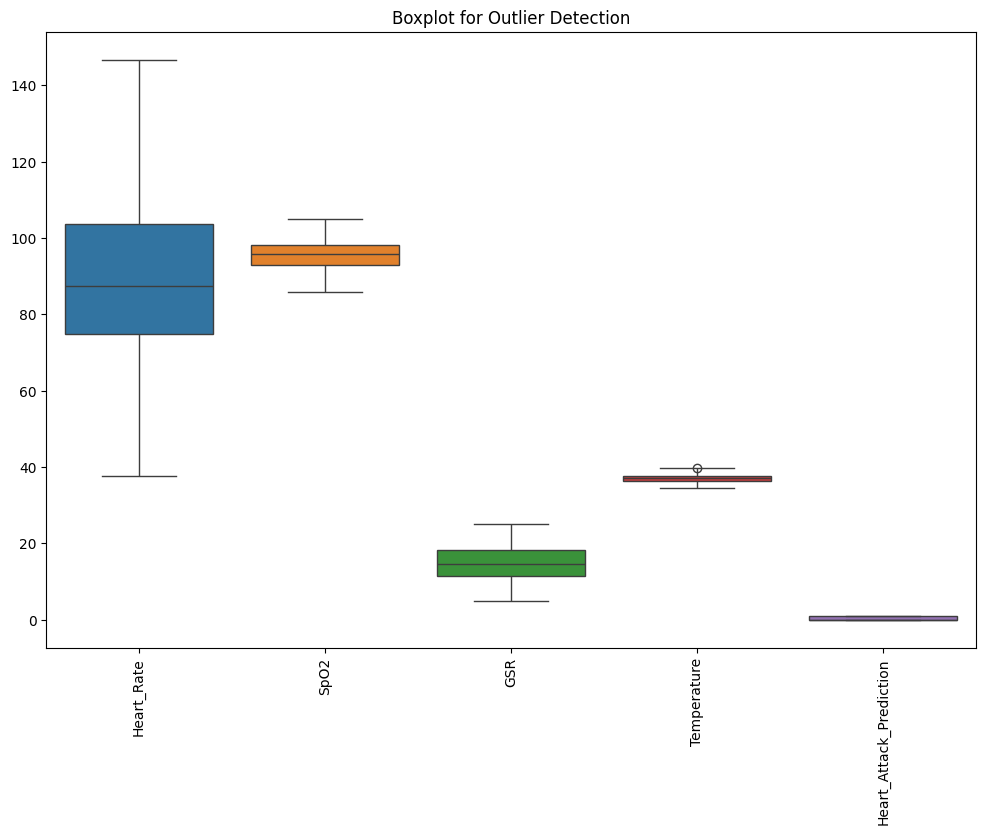

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

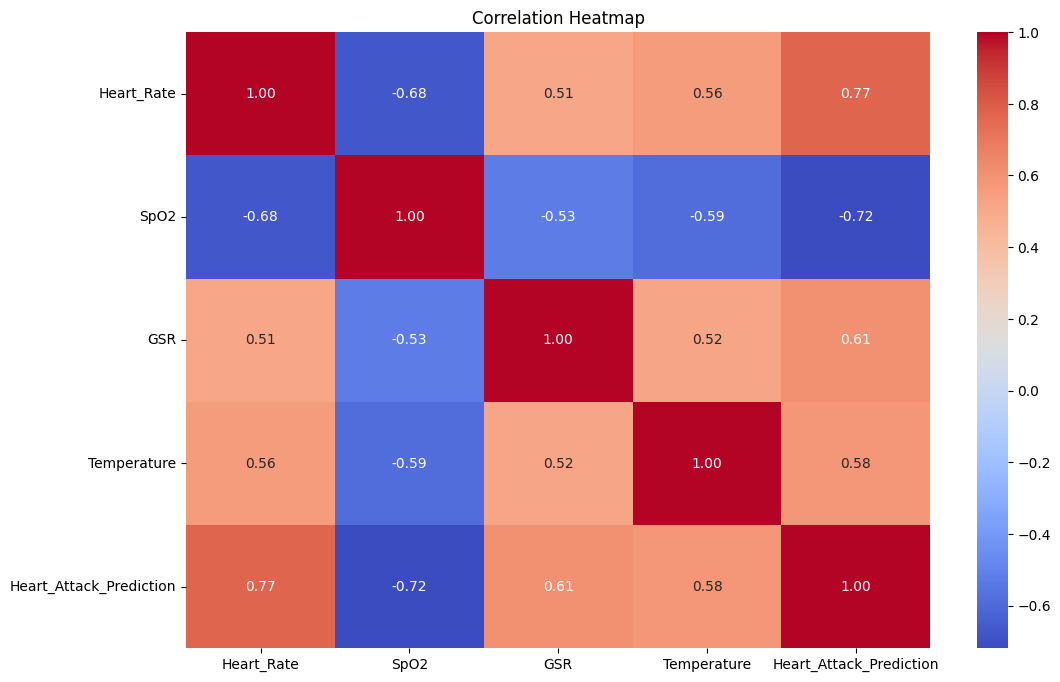

In [52]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Check if there are enough numeric columns
if numeric_data.shape[1] >= 2:
    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data for correlation heatmap.")